In [1]:
# Python – scripting language

# Pandas – data manipulation

# NumPy – numerical operations/ array operations

# Matplotlib / Seaborn – visualization/ plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Import the dataset and explore basic info (nulls, data types).

In [13]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [55]:
# count of nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            891
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked       891
dtype: int64

In [56]:
# handling missing values

In [57]:
#1. by dropping the values
# df.dropna()

In [109]:
# by filling missing values - mean/median/mode
df['Age'].fillna(20)
# df.drop(columns=['Cabin'], inplace=True)

0      20.0
1      20.0
2      20.0
3      20.0
4      20.0
       ... 
886    20.0
887    20.0
888    20.0
889    20.0
890    20.0
Name: Age, Length: 891, dtype: float64

In [110]:
df['Fare'].fillna(df['Fare'].median())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [111]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            891
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [112]:
df['Embarked'].fillna('S')

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Embarked, Length: 891, dtype: int64

In [113]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            891
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [114]:
# Convert categorical features into numerical using encoding
df['Sex'].map({'male':0,'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [115]:
# Normalize/standardize the numerical features.
# normalization - assign mean and standerd deviation between 0 to 1
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# num_co=['Age','Fare']
# scaler.fit_transform(df[num_co])

In [116]:
# Normalize/standardize the numerical features.
# stamderization - assign mean=0 and standerd deviation=1 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_co=['Age','Fare']
scaler.fit_transform(df[num_co])

C:\Users\shiggu\OneDrive\anaconda\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\shiggu\OneDrive\anaconda\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\shiggu\OneDrive\anaconda\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


array([[        nan, -0.50244517],
       [        nan,  0.78684529],
       [        nan, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [        nan, -0.04438104],
       [        nan, -0.49237783]])

In [117]:
# 5.Visualize outliers using boxplots and remove them

ValueError: List of boxplot statistics and `positions` values must have same the length

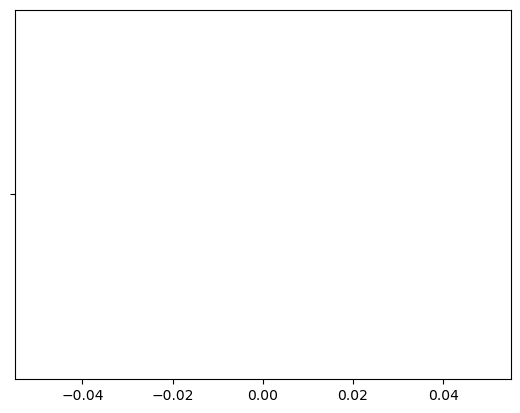

In [118]:
sns.boxplot(x=df['Age'])
plt.title("box_age")
plt.show()

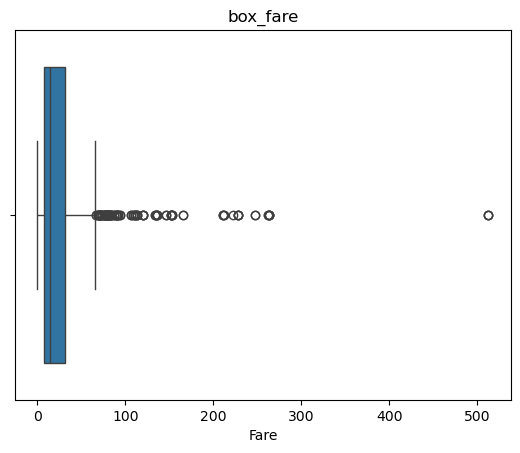

In [119]:
sns.boxplot(x=df['Fare'])
plt.title("box_fare")
plt.show()

In [125]:
df.shape

(0, 11)

In [120]:
def remove_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    l = Q1 - 1.5 * IQR
    u = Q3 + 1.5 * IQR
    return df[(df[col] >= l) & (df[col] <= u)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

In [124]:
# check
df.shape

(0, 11)